1. Даны значения величины заработной платы заёмщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
   zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя
   математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак),
   а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept,
   так и без.

Ответ. 1) С использованием intercept: y = 444.177357 + 2.620539 * x (математические операции)


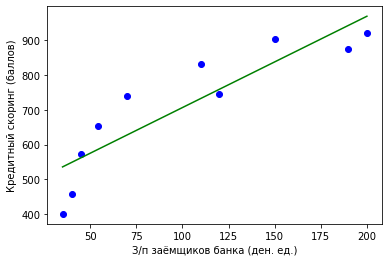

       2) Без использования intercept: y = 5.889820 * x (с помощью матриц)


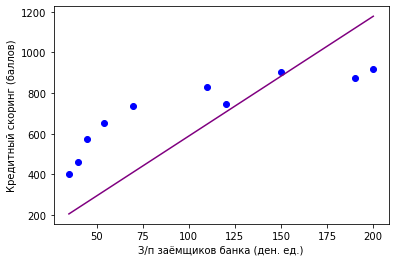

       3) С использованием intercept: y = 444.177357 + 2.620539 * x (с помощью матриц)


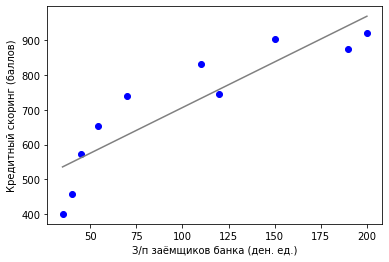

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_graph(use_intercept):
    global a, b, c, zp, ks
    plt.scatter(zp, ks, color = "blue")
    x = np.linspace(min(zp), max(zp), 2)
    if use_intercept == 0:
        b0 = a
        b1 = b
        clr = "green"
    elif use_intercept == 1:
        b0 = 0
        b1 = c[0]
        clr = "purple"
    elif use_intercept == 2:
        b0 = c[0][0]
        b1 = c[1][0]
        clr = "gray"
        
    y = b0 + b1 * x
    plt.plot(x, y, color = clr)
    plt.xlabel('З/п заёмщиков банка (ден. ед.)')
    plt.ylabel('Кредитный скоринг (баллов)')
    plt.show()
    
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp ** 2) - np.mean(zp) ** 2)
a = np.mean(ks) - b * np.mean(zp)

y_arr = ks.reshape(10, 1)
x_arr = zp.reshape(10, 1)
c = np.dot(np.linalg.inv(np.dot(x_arr.T, x_arr)), x_arr.T @ y_arr)


print("1. Даны значения величины заработной платы заёмщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):\n   zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя\n   математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак),\n   а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept,\n   так и без.")
print(f"\nОтвет. 1) С использованием intercept: y = {a:.6f} + {b:.6f} * x (математические операции)")
plot_graph(0)
print(f"       2) Без использования intercept: y = {c[0, 0]:.6f} * x (с помощью матриц)")
plot_graph(1)

x_arr = np.hstack([np.ones((10, 1)), x_arr])
c = np.dot(np.linalg.inv(np.dot(x_arr.T, x_arr)), x_arr.T @ y_arr)
print(f"       3) С использованием intercept: y = {c[0][0]:.6f} + {c[1][0]:.6f} * x (с помощью матриц)")
plot_graph(2)




In [46]:
print("2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).\n")
len_x = len(zp)

def mse_(B0, B1, y = ks, x = zp, n = len_x):
    return np.sum((B0 + B1 * x - y) ** 2) / n

B1 = 0.1
alpha = 0.000001

for i in range(2501):
    B1 -= alpha * (2 / len_x) * np.sum((B1 * zp - ks) * zp)
    if i % 500 == 0:
        print(f"Iteration = {i:>4}     B1 = {B1:<17}     mse = {mse_(0, B1)}")
        
print(f"\nОтвет: B1 = {B1:.6f} - см. п. 1.2")

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

Iteration =    0     B1 = 0.25952808            mse = 493237.7212546963
Iteration =  500     B1 = 5.889815595583751     mse = 56516.858416040064
Iteration = 1000     B1 = 5.8898204201285544     mse = 56516.85841571941
Iteration = 1500     B1 = 5.889820420132673     mse = 56516.85841571943
Iteration = 2000     B1 = 5.889820420132673     mse = 56516.85841571943
Iteration = 2500     B1 = 5.889820420132673     mse = 56516.85841571943

Ответ: B1 = 5.889820 - см. п. 1.2


In [53]:
print("3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться\n   на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной\n   итерации).\n")

B0 = 0.1
B1 = 0.1
alpha = 0.000005

for i in range(int(3600000 * 2.5) + 1):
    y_pred = B0 + B1 * zp
    B0 -= alpha * (2 / len_x) * np.sum((y_pred - ks))
    B1 -= alpha * (2 / len_x) * np.sum((y_pred - ks) * zp)
    if i % 300000 == 0:
        print(f"Iteration = {i:>7}     B0 = {B0:.15f}     B1 = {B1:.15f}     mse = {mse_(B0, B1)}")
        
print(f"\nОтвет: B0 = {B0:.6f}, B1 = {B1:.6f} - см. пп. 1.1, 1.3")

3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
   на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной
   итерации).

Iteration =       0     B0 = 0.106996600000000     B1 = 0.897539000000000     mse = 399736.8945969929
Iteration =  300000     B0 = 236.715849965206786     B1 = 4.147547300567454     mse = 17388.2222155033
Iteration =  600000     B0 = 347.247136642088208     B1 = 3.333988161936593     mse = 8853.714668002625
Iteration =  900000     B0 = 398.889593820122627     B1 = 2.953876844664372     mse = 6990.676245326846
Iteration = 1200000     B0 = 423.017996406991756     B1 = 2.776281133845441     mse = 6583.984688134168
Iteration = 1500000     B0 = 434.291275085185021     B1 = 2.693304818571127     mse = 6495.206045311317
Iteration = 1800000     B0 = 439.558379349487439     B1 = 2.654536602465296     mse = 6475.8261312657405
Iteration 